# <center>Построение простейших моделей прогнозирования</center>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

Загрузим и отобразим данные об объемах пассажирских авиаперевозок.

In [2]:
passengers = pd.read_csv('data/passengers.csv', index_col='date', parse_dates=True)

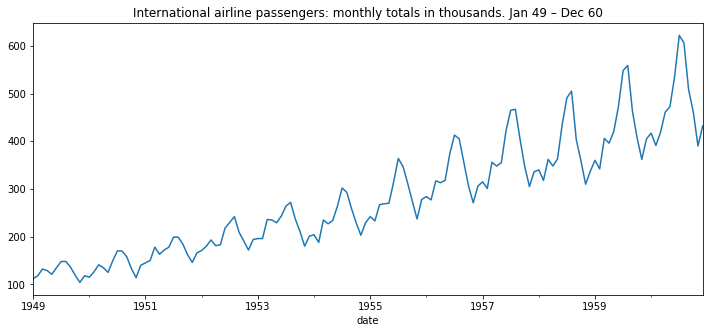

In [3]:
passengers['num_passengers'].plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()

Временной ряд обладает трендом и годовой сезонностью, которые должны быть учтены при построении моделей прогнозирования. Наличие тренда и сезонности проявляется на коррелограмме. Для построения коррелограммы воспользуемся функцией `plot_acf` из библиотеки `statsmodels`.

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

Опция `lags` позволяет задавать количество лагов для вычисления значений автокорреляции.

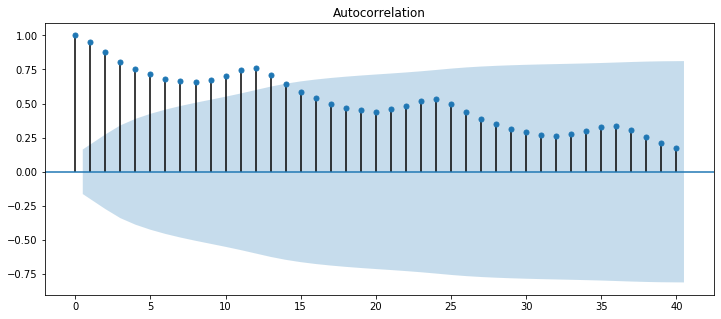

In [5]:
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(passengers['num_passengers'], lags=40, ax=ax)
plt.show()

<div class="alert alert-info">

<h3> Задание 1</h3>
<p></p>
Постройте наивную сезонную модель прогнозирования. Данная модель предполагает, что количество пассажиров в январе 1961 г. будет таким же, как и в январе 1960 г. С помощью полученной модели получите прогноз на 3 года вперед и отобразите результат на графике.
<p></p>
  
</div>

In [6]:
from dateutil import parser
k = parser.parse("Jan 1 1960 12:00AM")
passengers = pd.read_csv('data/passengers.csv', index_col='date', parse_dates=True)
from datetime import datetime  
from datetime import timedelta 
from dateutil.relativedelta import relativedelta
k = k + relativedelta(years=1);k

datetime.datetime(1961, 1, 1, 0, 0)

In [7]:
print(type(passengers))

<class 'pandas.core.frame.DataFrame'>


In [8]:
# # k = parser.parse("Jan 1 1961 12:00AM")
def predict_3_years_by_val(passengers):
    k = parser.parse("Jan 1 1961 12:00AM")
    for i in range(3):
        l = 1
        for j in list(passengers['num_passengers'][-12:]):
            passengers.loc[k,'num_passengers'] = j 
            k = k + relativedelta(month=l)
            l+=1
        k = k+ relativedelta(years=1) + relativedelta(month=1)
    return passengers

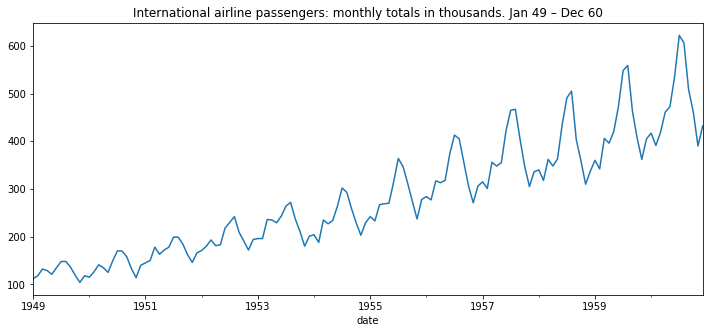

In [9]:
passengers['num_passengers'].plot(figsize=(12,5))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()

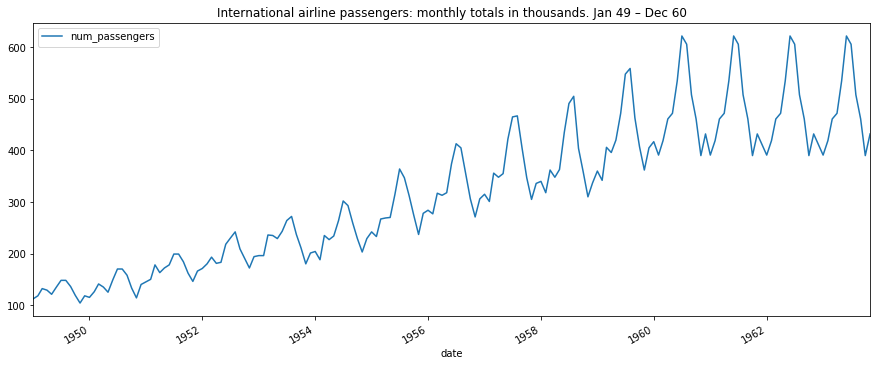

In [10]:
predict_3_years_by_val(passengers).plot(figsize=(15,6))
plt.title('International airline passengers: monthly totals in thousands. Jan 49 – Dec 60')
plt.show()

<div class="alert alert-info">

<h3> Задание 2</h3>
<p></p>
Наивная сезонная модель прогнозирования не учитывает тренд временного ряда. Воспользуйтесь методом экстраполяции тренда, постройте прогноз также на 3 года и отобразите результат на графике.
    
<em>Комментарий: пока реализуйте только метод экстраполяции тренда! Не спешите объединять модели.</em>
<p></p>
  
</div>

In [11]:
passengers = pd.read_csv('data/passengers.csv', index_col='date', parse_dates=True)
y0 = passengers['num_passengers'][0]
yt = passengers['num_passengers'][-1]

In [12]:
x = np.linspace(0, passengers.shape[0]+12*3, 1000)

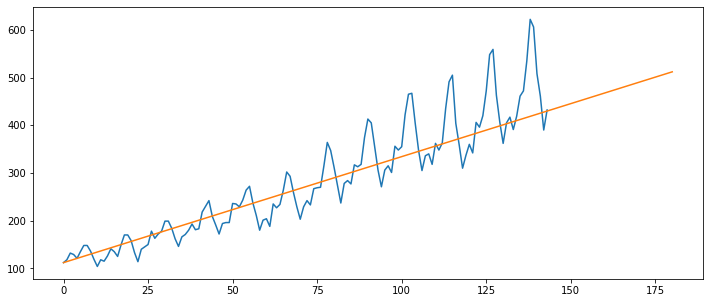

In [13]:
plt.subplots(figsize=(12,5))
plt.plot(passengers['num_passengers'].values)
plt.plot(x, x*(yt-y0)/passengers.shape[0] + y0, linestyle='solid')

In [14]:
approx = [i*(yt-y0)/passengers.shape[0]+y0 for i in range(passengers.shape[0])];approx
new_trend =  [i*(yt-y0)/passengers.shape[0]+y0 for i in range(passengers.shape[0],passengers.shape[0]+12*3)]


<div class="alert alert-info">

<h3> Задание 3</h3>
<p></p>
В результате выполнения предыдущих заданий вы получили две модели, каждая из которых описывает только одну из компонент ряда: либо тренд, либо сезонность. Попробуем их объединить. Для этого:
    <p></p>
    <li>вычтите из исходного ряда трендовую составляющую, постройте коррелограмму полученного ряда остатков;</li>
    <li>для ряда остатков постройте наивную сезонную модель.</li>
    
 Получите прогноз на 3 года вперед с помощью комбинации моделей. Результат отобразите на графике.
<p></p>
  
</div>

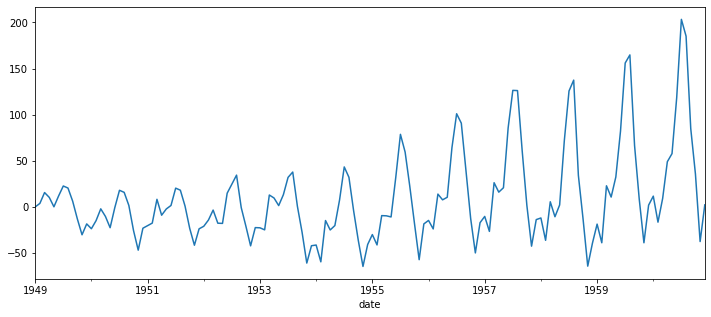

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
import copy
passengers = pd.read_csv('data/passengers.csv', index_col='date', parse_dates=True)
passengers['seasonality'] = passengers['num_passengers'] - approx
passengers['seasonality'].plot(figsize=(12,5))
plt.show()

In [16]:
new_val_season =  np.tile(passengers['seasonality'][-12:],3)
prom_k = new_val_season + new_trend
fut_passengers = copy.copy(passengers)
k = parser.parse("Jan 1 1961 12:00AM")
k_new = k +  relativedelta(years=3)
date_new = pd.date_range(k, k_new, freq='MS')
for i, j in zip(prom_k,date_new):
    fut_passengers.loc[j,'num_passengers'] = i 

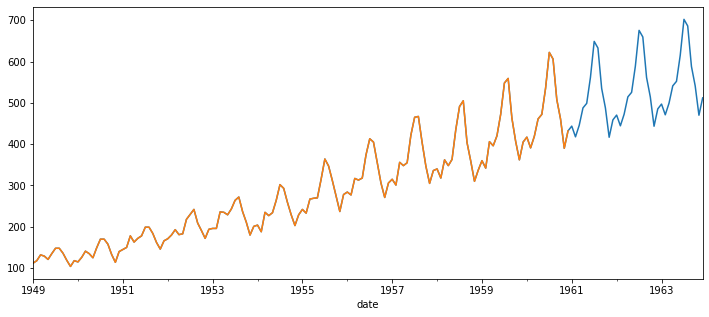

In [17]:
fut_passengers['num_passengers'].plot()
passengers['num_passengers'].plot(figsize=(12,5))
plt.show()

### Мультипликативная сезонность

Во временном ряду пассажирских авиаперевозок наблюдается **мультипликативная сезонность**, которая характеризуется увеличением амплитуды сезонных колебаний. В случае когда амплитуда сезонных колебаний не меняется, говорят об **аддитивной сезонности**.

Ряд с трендом и аддитивной сезонностью может быть представлен в виде суммы его компонент:

$$y(t)=b(t)+s(t)+\epsilon(t),$$

где $b(t)$ &ndash; трендовая, $s(t)$ &ndash; сезонная, а $\epsilon(t)$ &ndash; случайная компоненты ряда.

Ряд с мультипликативной сезонностью представляет собой произведение данных компонент:

$$y(t)=b(t)\times s(t)\times \epsilon(t).$$

<div class="alert alert-info">

<h3> Задание 4</h3>
<p></p>
Постройте мультипликативную модель прогнозирования, получите прогноз на 3 года вперед и отобразите результат на графике.
<p></p>
  
</div>

In [18]:
passengers = pd.read_csv('data/passengers.csv', index_col='date', parse_dates=True)
passengers['mult_seas'] = passengers['num_passengers'] / approx

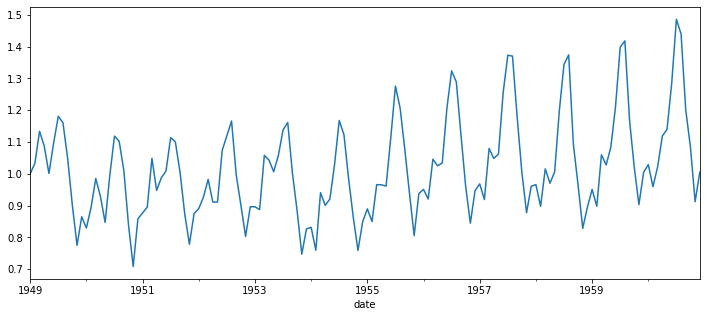

In [19]:
passengers['mult_seas'].plot(figsize=(12,5))
plt.show()

In [20]:
new_val_season =  np.tile(passengers['mult_seas'][-12:],3)
prom_k = new_val_season * new_trend
fut_passengers_mult = copy.copy(passengers)

for i, j in zip(prom_k,date_new):
    fut_passengers_mult.loc[j,'num_passengers'] = i 

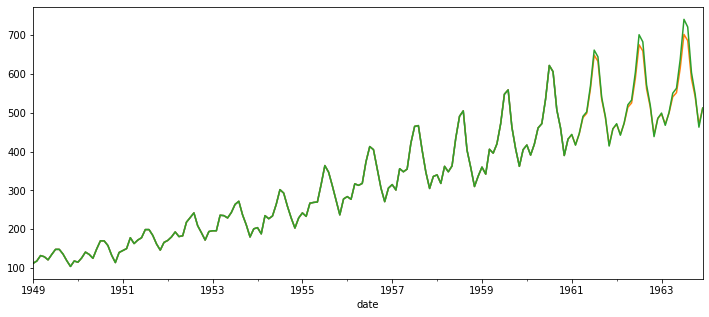

In [21]:
passengers['num_passengers'].plot(figsize=(12,5))
fut_passengers['num_passengers'].plot()
fut_passengers_mult['num_passengers'].plot()
plt.show()